In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [25]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df=pd.read_csv(boston_url)

In [39]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [27]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'Median value of owner-occupied homes')

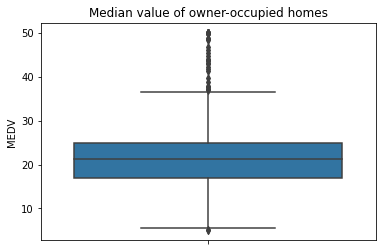

In [28]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title("Median value of owner-occupied homes")

Text(0.5, 0.98, ' histogram for the Charles river variable')

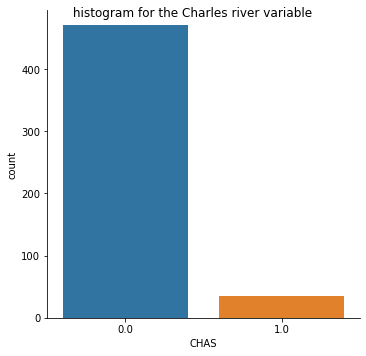

In [29]:
hist = sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
hist.fig.suptitle(' histogram for the Charles river variable')

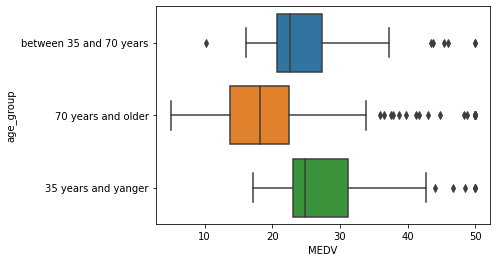

In [55]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group']='35 years and yanger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group']='70 years and older'
ax2 = sns.boxplot(x = 'MEDV', y = 'age_group', data = boston_df)

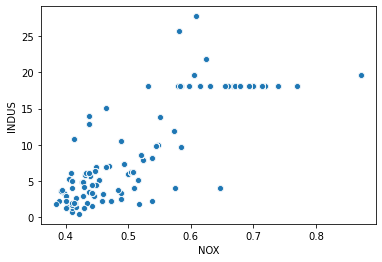

In [37]:
ax3 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
# There exists the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#We can see positive correlation

Text(0.5, 0.98, 'a histogram for the pupil to teacher ratio variable')

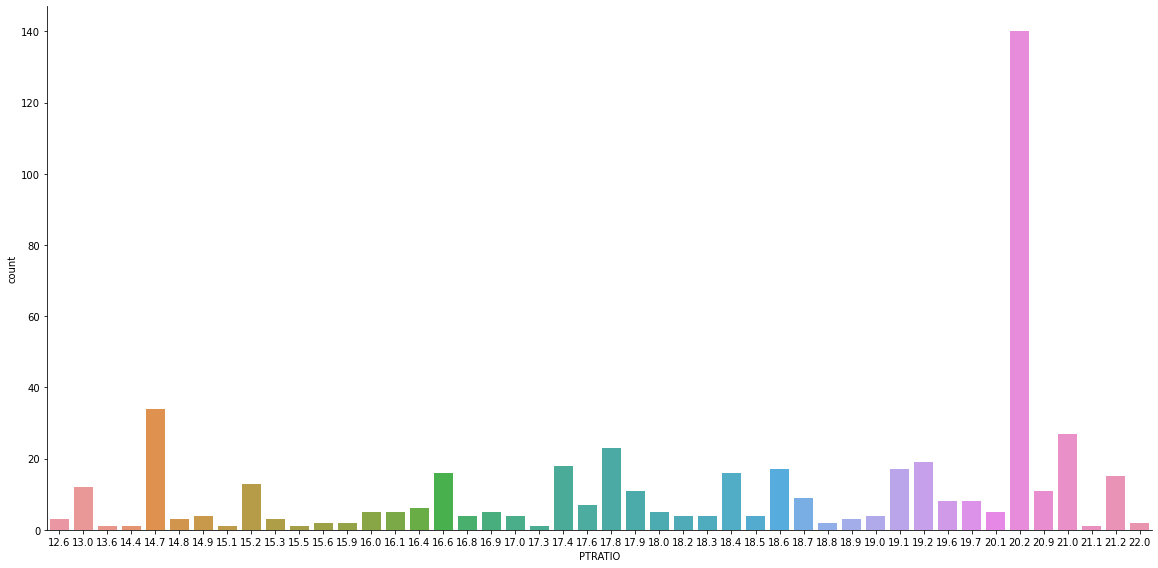

In [48]:
hist2 = sns.catplot(x = 'PTRATIO', kind = 'count', data = boston_df, height = 8, aspect = 2)
hist.fig.suptitle('a histogram for the pupil to teacher ratio variable')

In [50]:
#H0: no a significant difference in median value of houses bounded by the Charles river, mean1=mean2
#HA: there is a difference in median value of houses bounded by the Charles river, mean1 not equal mean2
#Use α = 0.05
#Test for equality variances
scipy.stats.levene(boston_df[boston_df['CHAS']== 1]['MEDV'], boston_df[boston_df['CHAS']== 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [51]:
#Since the p-value is less than 0.05, the variences are not equal

In [52]:
#T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']== 1]['MEDV'], boston_df[boston_df['CHAS']== 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

In [53]:
#Conclusion: Sinse the p-value is less than 0.05, we reject the H0 as there is enough proof that is a significant difference in median value of houses bounded by the Charles river 

In [57]:
#H0: no a significant difference in median value of houses bounded for each proportion of owner occupied units built prior to 1940, mean1=mean2=mean3
#HA: At least one of the means differ
#Use α = 0.05
#Test for equality variances
scipy.stats.levene(boston_df[boston_df['age_group']== '35 years and yanger']['MEDV'], boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV'], boston_df[boston_df['age_group']== '70 years and older']['MEDV'], center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [58]:
#Since the p-value is more than 0.05, the variences are equal

In [64]:
# one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group']== '35 years and yanger']['MEDV'], boston_df[boston_df['age_group']== 'between 35 and 70 years']['MEDV'], boston_df[boston_df['age_group']== '70 years and older']['MEDV'])
print("f_statistic:{0}, p_value:{1}".format(f_statistic, p_value))

f_statistic:36.40764999196599, p_value:1.7105011022702984e-15


In [65]:
#Conclusion: Sinse the p-value is less than 0.05, we reject the H0 as there is significant evidence that at least one of the means deffer. 

In [67]:
#H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#HA: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town
#Use pearson correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

In [68]:
#Conclusion: Sinse the p-value is less than 0.05, we reject the H0 and conclude that exists a relationship  between Nitric oxide concentrations and proportion of non-retail business acres per town

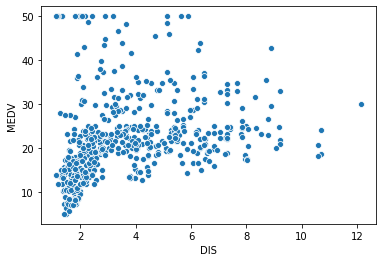

In [69]:
#H0: there is no the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
#HA: there is an association an additional weighted distance  to the five Boston employment centres and the median value of owner occupied homes
sns.scatterplot(x = 'DIS', y = 'MEDV', data = boston_df)
#We can see positive correlation

In [73]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        04:25:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Conclusion: Sinse the p-value is less than 0.05, we reject the H0 and conclude that there exists a relationship  between an additional weighted distance  to the five Boston employment centres and the median value of owner occupied homes
#R-correlation √0.062 = 0.25
